# Trying the Logic of Fillipo Model

In [1]:
import numpy as np
import os
import pandas as pd

basedir = "/Users/nxr042/PycharmProjects/PlacentaBarrier"

placenta_data_raw = pd.read_csv(os.path.join(basedir,"smiles-transformer-master/data/Placenta_barrier.csv"))
# Obtained from Padel_all_descriptors.ipynb based on Fillipo et al
# copied dict from Padel_all_descriptors.ipynb and saved for future purpose as csv
#target_labels = pd.DataFrame.from_dict(cross_placenta, orient='index')
#target_labels.to_csv(os.path.join(basedir, "Nix_TAM_inference", "fillipo_target_labels.csv"))

cross_placenta = pd.read_csv(os.path.join(basedir, "Nix_TAM_inference", "fillipo_target_labels.csv"), 
                             index_col=0).to_dict()["0"]

placenta_data_raw['prediction'] = placenta_data_raw['cid'].map(cross_placenta)
placenta_data_raw.head()

# these cids were skipped in Fillipo's paper
skipped_placenta_smiles = [2, 111, 166, 196, 229, 239, 240]
cid_skipped = []
for idx in skipped_placenta_smiles:
    cid_skipped.append(placenta_data_raw.iloc[idx]['cid'])
print(f'cid of skipped smiles:{cid_skipped}')

# finally we have 237 drugs
sorted_cid = list(placenta_data_raw['cid'])
sorted_target = []
for i in range(len(sorted_cid)):
    if i not in skipped_placenta_smiles:
        #print(sorted_cid[i])
        sorted_target.append(cross_placenta[sorted_cid[i]])
print(np.asarray(sorted_target), len(sorted_target))

placenta_target_labels = [1 if elem=='Yes' else 0 for elem in sorted_target]
print(placenta_target_labels, sum(placenta_target_labels))

filtered_data = placenta_data_raw[~placenta_data_raw["cid"].isin(cid_skipped)]
print(filtered_data.shape)

cid of skipped smiles:[948, 14969, 114976, 644073, 16130199, 90659973, 118984375]
['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes'

In [2]:
# These are the drugs in the "NO" labels
# Insulin is not trained
no_drugs_idxs = np.where(np.asarray(placenta_target_labels) == 0)
filtered_data.iloc[no_drugs_idxs]["cmpdname"].values

array(['Salbutamol', 'Chlorthalidone', "p,p'-DDE", 'Fenoterol',
       'Glyburide', 'Hexoprenaline', 'Prazosin', 'Succinylcholine',
       'Levothyroxine', 'Liothyronine', 'Glycopyrrolate', 'Erythromycin',
       'Metocurine', 'Vecuronium', 'Sufentanil', 'Atracurium besylate',
       'Pravastatin', 'Duloxetine', 'Amprenavir', 'Oseltamivir',
       'Clarithromycin', 'Lopinavir', 'Darunavir', 'Ritonavir',
       'Norepinephrine', 'Ouabain', 'Meropenem', 'Saquinavir',
       'Azithromycin', 'Indinavir', '(Z)-roxithromycin'], dtype=object)

Drungs removed from training in Fillipo's dataset


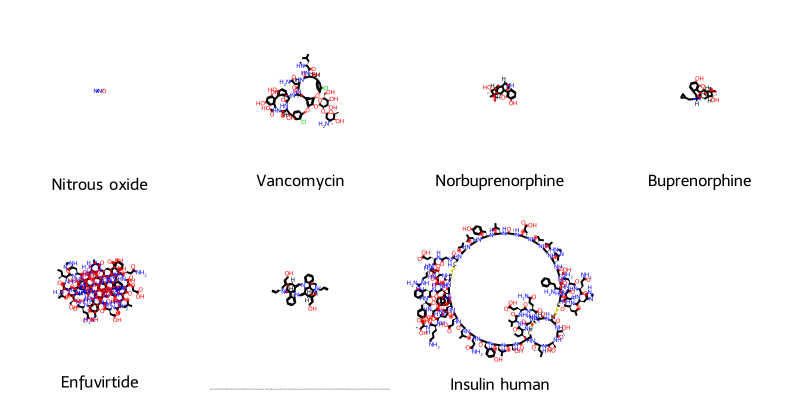

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from pubchempy import get_compounds
from IPython.display import display
import numpy as np

def draw_molecules_grid(cids, mols_per_row=4, sub_img_size=(200, 200), legends=None):
    # Fetch the molecules from PubChem
    mols = []
    
    if legends is None:
        legends = []
    
    # Ensure CIDs are passed as strings
    cids = [str(cid) for cid in cids]
    
    for cid in cids:
        # Fetch the compound from PubChem using CID
        compounds = get_compounds(cid, 'cid')
        
        if compounds:
            compound = compounds[0]
            mol = Chem.MolFromSmiles(compound.isomeric_smiles)
            if mol:
                mols.append(mol)
                if legends is None:
                    legends.append(compound.iupac_name or f"CID: {cid}")
            else:
                print(f"Error: Invalid molecule for CID {cid}.")
        else:
            print(f"Error: CID {cid} not found.")
    
    # Check if we have any valid molecules
    if len(mols) > 0:
        # Create a grid of images
        img = Draw.MolsToGridImage(mols, molsPerRow=mols_per_row, subImgSize=sub_img_size, legends=legends)
        display(img)
    else:
        print("No valid molecules found.")

# Example usage with a list of CIDs (replace with your actual CIDs)
print("Drungs removed from training in Fillipo's dataset")
legends = placenta_data_raw.iloc[skipped_placenta_smiles]["cmpdname"].values
draw_molecules_grid(cid_skipped, mols_per_row=4, legends=legends.tolist()+["Ethanol"])

In [44]:
import os
import warnings        
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import MACCSkeys, RDKFingerprint, rdFingerprintGenerator 
from padelpy import from_smiles
from openbabel import pybel

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
basedir = "/Users/nxr042/PycharmProjects/PlacentaBarrier"

def path(*parts):
    """Joins path components relative to the base directory."""
    return os.path.join(basedir, *parts)

def generate_fingerprints_from_smiles(smiles_list, fp_types=['morgan', 'maccs', 'rdkit', 'pubchem', 'fp3'], 
                                      output_dir=path('Nix_TAM_inference'),
                                      drug_name=None):
    os.makedirs(output_dir, exist_ok=True)
    
    for fp_type in fp_types:
        print(f"\n🔹 Generating {fp_type.upper()} fingerprints...")
        fps = []

        if fp_type == 'morgan':
            fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
            for smi in smiles_list:
                mol = Chem.MolFromSmiles(smi)
                if mol is None:
                    fps.append(np.zeros(1024))
                    continue
                bitstr = fpgen.GetFingerprint(mol).ToBitString()
                fps.append(np.array(list(bitstr), dtype=np.int8))

        elif fp_type == 'maccs':
            for smi in smiles_list:
                mol = Chem.MolFromSmiles(smi)
                if mol is None:
                    fps.append(np.zeros(166))
                    continue
                fp = MACCSkeys.GenMACCSKeys(mol)
                arr = np.array(fp, dtype=np.int8)[1:]  # discard the first bit as it is always zero
                fps.append(arr)

        elif fp_type == 'rdkit':
            for smi in smiles_list:
                mol = Chem.MolFromSmiles(smi)
                if mol is None:
                    fps.append(np.zeros(2048))
                    continue
                fp = RDKFingerprint(mol, fpSize=2048)
                bitstr = fp.ToBitString()
                fps.append(np.array(list(bitstr), dtype=np.int8))

        elif fp_type == 'pubchem':
            try:
                # Get list of dicts
                if isinstance(smiles_list, np.ndarray):
                    smiles_list = smiles_list.tolist()
                pubchem_out = path(output_dir, 
                             f"{fp_type}_{drug_name}.csv" if len(smiles_list) == 1 else f"placenta_{fp_type}_fingerprints.csv")
                dict_list = from_smiles(smiles_list, descriptors=False, fingerprints=True, 
                                        output_csv=pubchem_out)
                
                keys = list(dict_list[0].keys())
                for fp_dict in dict_list:
                    arr = [int(fp_dict[k]) for k in keys]
                    fps.append(np.array(arr, dtype=np.int8))
            except Exception as e:
                print(f"❌ PubChem failed: {e}")
                continue
        
        elif fp_type == 'fp3':  # openbabel for substructures
            for smi in smiles_list:
                try:
                    mol = pybel.readstring("smi", smi)
                    fp3 = mol.calcfp(fptype="FP3")
                    arr = np.zeros(1024, dtype=int)
                    arr[np.array(fp3.bits) - 1] = 1  # -1 because bits are 1-based
                    fps.append(arr)
                except Exception as e:
                    print(f"⚠️  Failed to generate FP3 for SMILES: {smi}, error: {e}")
                    continue

        else:
            print(f"❌ Unsupported fingerprint type: {fp_type}")
            continue

        # Reshape and save
        arr = np.array(fps)
        if len(smiles_list) == 1:
            arr = arr.reshape(1, -1)
        out_path = path(output_dir, f"{fp_type}_{drug_name}.npy" if len(smiles_list) == 1 else f"placenta_{fp_type}_fingerprints.npy")
        np.save(out_path, arr)
        print(f"✅ Saved to {out_path} — shape {arr.shape}")

def run_inference(drug_name: str, 
                  target_labels: list, 
                  outpath: str, 
                  fp_types: list = ['morgan', 'maccs', 'rdkit', 'pubchem', 'fp3'],
                  confidence_threshold: float = 0.7,
                  redo: bool = False):
    models = {
        "LDA": LinearDiscriminantAnalysis,
        "Logistic Regression": lambda: LogisticRegression(max_iter=1000, class_weight='balanced'),
        "Random Forest": lambda: RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
        "Decision Tree": lambda: DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        "Support Vector Machine": lambda: SVC(probability=True, class_weight='balanced'),
        "Gradient Boosting": GradientBoostingClassifier,
        "XGBoost": lambda: XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "LightGBM": lambda: LGBMClassifier(random_state=42, verbose=-1, verbosity=-1),
        "CatBoost": lambda: CatBoostClassifier(verbose=0, random_state=42),
        "Extra Trees": lambda: ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
        "QDA": QuadraticDiscriminantAnalysis
    }
    
    infer_drugs_path = path('Nix_TAM_inference','inferred_drugs_fingerprints')
    
    
    results = []
    y = np.array(target_labels).astype(int)

    total_iters = len(models) * len(fp_types)
    with tqdm(total=total_iters, desc=f"Inferencing for {drug_name}") as pbar:
        for fp in fp_types:
            try:
                X = np.load(path(f'Feature_extraction',f'Placenta_Fingerprints/{fp}.npy'))
                x_drug = np.load(path(infer_drugs_path, f'{fp}_{drug_name}.npy'))
            except Exception as e:
                print(f"❌ Error loading {fp.upper()} for {drug_name}: {e}")
                continue

            # Standardize + PCA
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
            x_scaled = scaler.transform(x_drug)

            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X_scaled)
            x_pca = pca.transform(x_scaled)

            pca_center = X_pca.mean(axis=0)
            dist = np.linalg.norm(x_pca - pca_center)
            dists_train = np.linalg.norm(X_pca - pca_center, axis=1)
            d95 = np.percentile(dists_train, 95)

            for model_name, model_fn in models.items():
                clf = model_fn()
                try:
                    clf.fit(X, y)
                    pred = clf.predict(x_drug)[0]
                    prob = clf.predict_proba(x_drug)[0][1] if hasattr(clf, "predict_proba") else "N/A"
                    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()
                    auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc').mean()

                    is_trustworthy = (prob != "N/A") and (prob >= confidence_threshold) and (dist <= d95)

                    results.append({
                        "Fingerprint": fp.upper(),
                        "Model": model_name,
                        "Drug": drug_name.capitalize(),
                        "Prediction": "YES" if pred == 1 else "NO",
                        "Confidence": round(prob, 4) if prob != "N/A" else "N/A",
                        "CV_Accuracy": round(acc, 4),
                        "CV_ROC_AUC": round(auc, 4),
                        "PCA_Distance": round(dist, 4),
                        "95%_Train_Distance": round(d95, 4),
                        "Trustworthy": "✅" if is_trustworthy else "⚠️"
                    })

                except Exception as e:
                    print(f"❌ {model_name} failed on {fp.upper()}: {e}")
                    results.append({
                        "Fingerprint": fp.upper(),
                        "Model": model_name,
                        "Drug": drug_name.capitalize(),
                        "Prediction": "ERROR",
                        "Confidence": "N/A",
                        "CV_Accuracy": "N/A",
                        "CV_ROC_AUC": "N/A",
                        "PCA_Distance": "N/A",
                        "95%_Train_Distance": "N/A",
                        "Trustworthy": "❌"
                    })
                pbar.update(1)

    # Save or append results
    os.makedirs(os.path.dirname(outpath), exist_ok=True)
    filename = f"{drug_name}_predictions.csv"
    output_file = os.path.join(outpath, filename)

    if os.path.exists(output_file) and not redo:
        df_existing = pd.read_csv(output_file)

        existing_keys = set(zip(df_existing["Fingerprint"], df_existing["Model"]))
        new_rows = [
            row for row in results 
            if (row["Fingerprint"], row["Model"]) not in existing_keys
        ]
        df_new = pd.DataFrame(new_rows)
        df_combined = pd.concat([df_existing, df_new], ignore_index=True)
        df_combined.to_csv(output_file, index=False)
        print(f"🔄 Appended {len(df_new)} new rows to existing file.")
    else:
        df_results = pd.DataFrame(results)
        df_results.to_csv(output_file, index=False)
        print("🆕 Created new result file.")

    print(f"\n✅ Predictions for {drug_name} saved to: {output_file}")
    return pd.read_csv(output_file)

def analyze_results(df_results: pd.DataFrame, 
                    drug_name: str, 
                    outpath=os.path.join(basedir,'Nix_TAM_inference')):
    # Drop rows with missing values for plotting
    df_clean = df_results[df_results['Confidence'] != 'N/A'].copy()
    df_clean['Confidence'] = df_clean['Confidence'].astype(float)
    df_clean['PCA_Distance'] = df_clean['PCA_Distance'].astype(float)

    # Summary Tables
    print("\n📊 Mean Confidence and PCA Distance by Fingerprint:")
    print(df_clean.groupby('Fingerprint')[['Confidence', 'PCA_Distance']].mean())

    print("\n📊 Mean Accuracy and ROC AUC by Model:")
    print(df_clean.groupby('Model')[['CV_Accuracy', 'CV_ROC_AUC']].mean())

    print("\n📊 Prediction Matrix (Model × Fingerprint):")
    print(df_clean.pivot(index='Model', columns='Fingerprint', values='Prediction'))

    # Plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Boxplot of PCA Distances
    sns.boxplot(data=df_clean, x='Fingerprint', y='PCA_Distance', ax=axes[0], palette='Set2')
    sns.stripplot(data=df_clean, x='Fingerprint', y='PCA_Distance', ax=axes[0], color='black', size=6, jitter=True)
    axes[0].set_title("PCA Distance Distribution")
    
    # Confidence vs PCA Distance
    sns.scatterplot(
        data=df_clean, markers={'YES': 'o', 'NO': 'X'},
        x='PCA_Distance', y='Confidence',
        hue='Fingerprint', style='Prediction', s=100, ax=axes[1]
    )
    axes[1].axhline(0.7, color='gray', linestyle='--', label='Confidence Threshold')
    axes[1].set_title(f"Confidence vs PCA Distance ({drug_name})")
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.suptitle(f"Prediction Summary for {drug_name}", fontsize=16, y=1.05)
    plt.tight_layout()
    filename = f"PCA_Distance_Confidence_{drug_name}.png"
    plt.savefig(os.path.join(outpath, filename), dpi=300)
    plt.show()

def plot_pca_fingerprints(drug_name, target_labels, 
                          fp_dir=os.path.join(basedir, f'Feature_extraction/Placenta_Fingerprints'), 
                          drug_fp_dir=os.path.join(basedir, 'Nix_TAM_inference/inferred_drugs_fingerprints'), 
                          outpath=os.path.join(basedir,'Nix_TAM_inference'), train_drug_pos={}):
    """
    Visualizes PCA projection of training drugs and a specific drug across 4 fingerprint types.

    Args:
        drug_name (str): Name of the drug (used in fingerprint filename).
        target_labels (array-like): Binary labels (0/1) for training data.
        fp_dir (str): Directory containing training fingerprints.
        drug_fp_dir (str): Directory containing fingerprint of the test drug.
    """


    fp_types = ['morgan', 'maccs', 'rdkit', 'pubchem']
    y = np.array(target_labels).astype(int)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for idx, fp in enumerate(fp_types):
        ax = axes[idx]
        try:
            X = np.load(f'{fp_dir}/{fp}.npy')
            x_drug = np.load(f'{drug_fp_dir}/{fp}_{drug_name}.npy')
        except Exception as e:
            ax.set_title(f"{fp.upper()} — Load Error")
            ax.axis('off')
            continue

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        x_scaled = scaler.transform(x_drug)

        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        x_pca = pca.transform(x_scaled)

        ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], alpha=0.3, label='Train: NO', color='blue')
        ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], alpha=0.3, label='Train: YES', color='red')
        
        for train_drug_name, train_drug_index in train_drug_pos.items():
            ax.annotate(train_drug_name.capitalize()+"(trained)",
                             (X_pca[train_drug_index, 0], X_pca[train_drug_index, 1]),
                             textcoords="offset points",
                             xytext=(3, 2),
                             ha='left',
                             fontsize=9,
                             color='black',
                             weight='bold')
        
        ax.scatter(x_pca[0, 0], x_pca[0, 1], color='black', marker='X', s=100, label=f'{drug_name}')
        ax.set_title(f"{fp.upper()} PCA")
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.suptitle(f"{drug_name.upper()} in PCA Space across Fingerprints", fontsize=16, y=1.05)
    filename = f"PCA_Fingerprints_{drug_name}.png" 
    plt.savefig(os.path.join(outpath, filename), dpi=300)
    plt.show()

def plot_pca_fingerprints_with_boxplot(drug_name, 
                                       target_labels,
                                       fp_dir=os.path.join(basedir, f'Feature_extraction/Placenta_Fingerprints'), 
                                       drug_fp_dir=os.path.join(basedir, 'Nix_TAM_inference/inferred_drugs_fingerprints'), 
                                       outpath=os.path.join(basedir,'Nix_TAM_inference'),
                                       fp="morgan",
                                      train_drug_pos={}):
    
    try:
        X = np.load(os.path.join(fp_dir, f'{fp}.npy'))
        x_drug = np.load(os.path.join(drug_fp_dir, f'{fp}_{drug_name}.npy'))
    except Exception as e:
        ax.set_title(f"{fp.upper()} — Load Error")
        ax.axis('off')
    
    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    x_drug_scaled = scaler.transform(x_drug)

    y = target_labels
    
    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    x_drug_pca = pca.transform(x_drug_scaled)

    # Distance from PCA centroid
    pca_center = X_pca.mean(axis=0)
    train_dists = np.linalg.norm(X_pca - pca_center, axis=1)
    drug_dist = np.linalg.norm(x_drug_pca - pca_center)

    # Percentiles
    percentiles = np.percentile(train_dists, [0, 25, 50, 75, 95, 100])
    drug_is_outlier = drug_dist > percentiles[4]

    fig, axs = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

    # PCA Scatter Plot
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', ax=axs[0], s=60)
    axs[0].scatter(x_drug_pca[0, 0], x_drug_pca[0, 1], color='red', edgecolor='black', s=150, label=f'{drug_name}')
    axs[0].set_title(f'{fp} PCA Plot\nDrug Distance = {drug_dist:.2f} | 95% = {percentiles[4]:.2f}')
    axs[0].legend()

    for train_drug_name, train_drug_index in train_drug_pos.items():
        axs[0].annotate(train_drug_name.capitalize()+"(trained)",
                         (X_pca[train_drug_index, 0], X_pca[train_drug_index, 1]),
                         textcoords="offset points",
                         xytext=(3, 2),
                         ha='left',
                         fontsize=9,
                         color='black',
                         weight='bold')
    
    
    
    # Box Plot of PCA Distances
    sns.boxplot(y=train_dists, ax=axs[1], width=0.3, color='lightblue')
    axs[1].scatter(0, drug_dist, color='red', zorder=5)
    axs[1].set_title('Distance from PCA Centroid')
    axs[1].set_ylabel('Euclidean Distance')
    axs[1].set_xticks([])

    plt.suptitle(f'{fp} - PCA + Outlier Analysis', fontsize=14)
    plt.tight_layout()
    filename = f"PCA_Boxplot_{fp}_{drug_name}.png"
    plt.savefig(os.path.join(outpath, filename), dpi=300)
    plt.show()

    return {
        "distance": drug_dist,
        "is_outlier": drug_is_outlier,
        "percentiles": {
            "min": percentiles[0],
            "25%": percentiles[1],
            "50%": percentiles[2],
            "75%": percentiles[3],
            "95%": percentiles[4],
            "max": percentiles[5],
        }
    }

# Create fingerprints for placenta dataset
""" If not using the fingerprints from https://doi.org/10.1109/ACCESS.2023.3272987 """

In [11]:
#generate_fingerprints_from_smiles(smiles_list, 
#                                  ['morgan', 'maccs', 'rdkit', 'pubchem'], 
#                                  output_dir='./Nix_TAM_inference/placenta_dataset_fingerprints')

# Create fingerprints for inferring drugs 

In [24]:
from openbabel import pybel
mol = pybel.readstring("smi", infer_smiles["Tamsulosin"])
fp3 = mol.calcfp(fptype="FP3")

In [16]:
infer_smiles = {"Tamsulosin":['CCOc1ccccc1OCCN[C@@H](C)Cc1ccc(OC)c(c1)S(=O)(=O)N'],
                "Thalidomide" : ["C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O"],
                "Erythropoietin" : ["CC1=CN(C(=O)NC1=O)[C@H]2C[C@@H]([C@H](O2)CO)N=[N+]=[N-]"],
                "Insulin" : ["CC[C@H](C)[C@H]1C(=O)N[C@H]2CSSC[C@@H](C(=O)N[C@@H](CSSC[C@@H](C(=O)NCC(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@@H](CSSC[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC2=O)CO)CC(C)C)CC3=CC=C(C=C3)O)CCC(=O)N)CC(C)C)CCC(=O)O)CC(=O)N)CC4=CC=C(C=C4)O)C(=O)N[C@@H](CC(=O)N)C(=O)O)C(=O)NCC(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](CCCNC(=N)N)C(=O)NCC(=O)N[C@@H](CC5=CC=CC=C5)C(=O)N[C@@H](CC6=CC=CC=C6)C(=O)N[C@@H](CC7=CC=C(C=C7)O)C(=O)N[C@@H]([C@@H](C)O)C(=O)N8CCC[C@H]8C(=O)N[C@@H](CCCCN)C(=O)N[C@@H]([C@@H](C)O)C(=O)O)C(C)C)CC(C)C)CC9=CC=C(C=C9)O)CC(C)C)C)CCC(=O)O)C(C)C)CC(C)C)CC2=CNC=N2)CO)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC2=CNC=N2)NC(=O)[C@H](CCC(=O)N)NC(=O)[C@H](CC(=O)N)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC2=CC=CC=C2)N)C(=O)N[C@H](C(=O)N[C@H](C(=O)N1)CO)[C@@H](C)O)NC(=O)[C@H](CCC(=O)N)NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](C(C)C)NC(=O)[C@H]([C@@H](C)CC)NC(=O)CN"],
                "Ritonavir": placenta_data_raw[placenta_data_raw["cmpdname"] == "Ritonavir"]["isosmiles"].values.tolist()
               }

drug = "Ritonavir"

generate_fingerprints_from_smiles(infer_smiles[drug], 
                                  output_dir=path('Nix_TAM_inference','inferred_drugs_fingerprints'), drug_name=drug)


🔹 Generating MORGAN fingerprints...
✅ Saved to /Users/nxr042/PycharmProjects/PlacentaBarrier/Nix_TAM_inference/inferred_drugs_fingerprints/morgan_Ritonavir.npy — shape (1, 1024)

🔹 Generating MACCS fingerprints...
✅ Saved to /Users/nxr042/PycharmProjects/PlacentaBarrier/Nix_TAM_inference/inferred_drugs_fingerprints/maccs_Ritonavir.npy — shape (1, 166)

🔹 Generating RDKIT fingerprints...
✅ Saved to /Users/nxr042/PycharmProjects/PlacentaBarrier/Nix_TAM_inference/inferred_drugs_fingerprints/rdkit_Ritonavir.npy — shape (1, 2048)

🔹 Generating PUBCHEM fingerprints...
✅ Saved to /Users/nxr042/PycharmProjects/PlacentaBarrier/Nix_TAM_inference/inferred_drugs_fingerprints/pubchem_Ritonavir.npy — shape (1, 881)

🔹 Generating FP3 fingerprints...
✅ Saved to /Users/nxr042/PycharmProjects/PlacentaBarrier/Nix_TAM_inference/inferred_drugs_fingerprints/fp3_Ritonavir.npy — shape (1, 1024)


# Running Inference

In [17]:
drug = "Ritonavir"
outpath = os.path.join(basedir, "Nix_TAM_inference/Predictions_Plots")
df = run_inference(drug_name=drug, 
              outpath=outpath, 
              target_labels=placenta_target_labels)

Inferencing for Ritonavir: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 55/55 [05:47<00:00,  6.32s/it]

🆕 Created new result file.

✅ Predictions for Ritonavir saved to: /Users/nxr042/PycharmProjects/PlacentaBarrier/Nix_TAM_inference/Predictions_Plots/Ritonavir_predictions.csv


# Analyze predictions and Visualize it


📊 Mean Confidence and PCA Distance by Fingerprint:
             Confidence  PCA_Distance
Fingerprint                          
FP3            0.871091        3.6799
MACCS          0.063182        5.0806
MORGAN         0.044591        2.2363
PUBCHEM        0.158536        7.8532
RDKIT          0.058373       15.8869

📊 Mean Accuracy and ROC AUC by Model:
                        CV_Accuracy  CV_ROC_AUC
Model                                          
CatBoost                    0.88450     0.79630
Decision Tree               0.83030     0.60448
Extra Trees                 0.87264     0.80018
Gradient Boosting           0.87426     0.77068
LDA                         0.78464     0.62532
LightGBM                    0.85728     0.74380
Logistic Regression         0.82174     0.73222
QDA                         0.57664     0.63020
Random Forest               0.87688     0.80488
Support Vector Machine      0.83884     0.78876
XGBoost                     0.86920     0.75668

📊 Prediction Matri

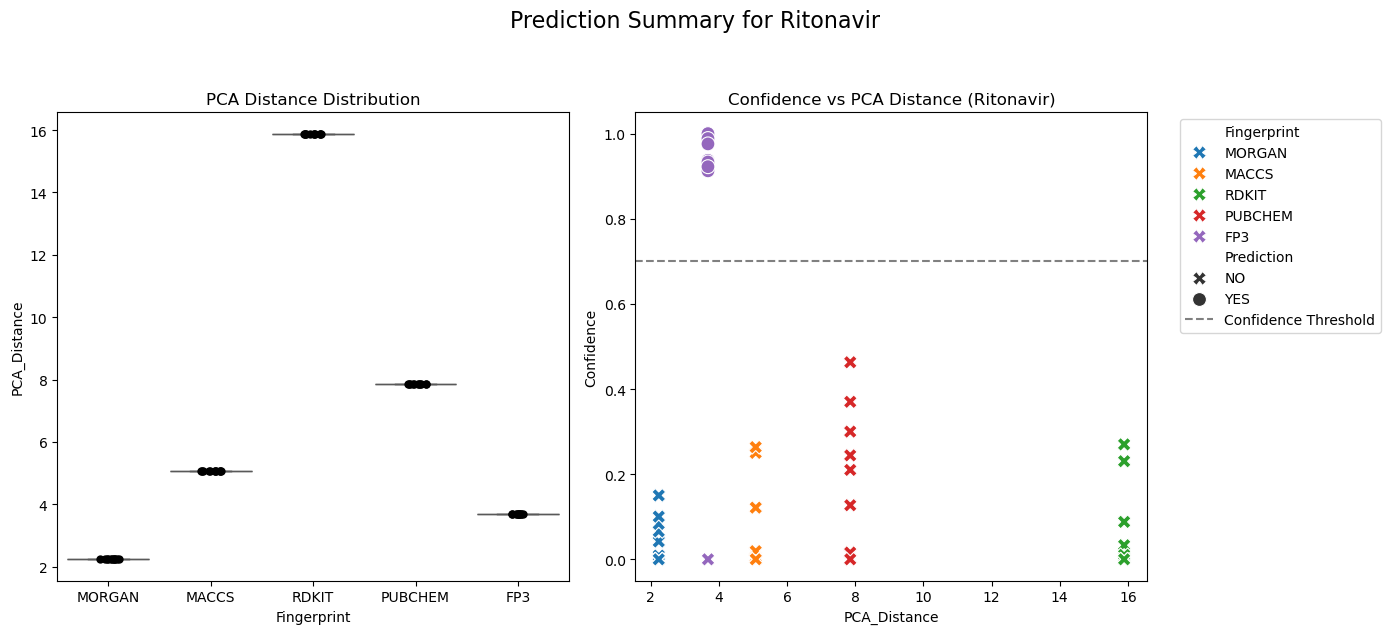

In [18]:
analyze_results(df_results=df, drug_name=drug, outpath=outpath)

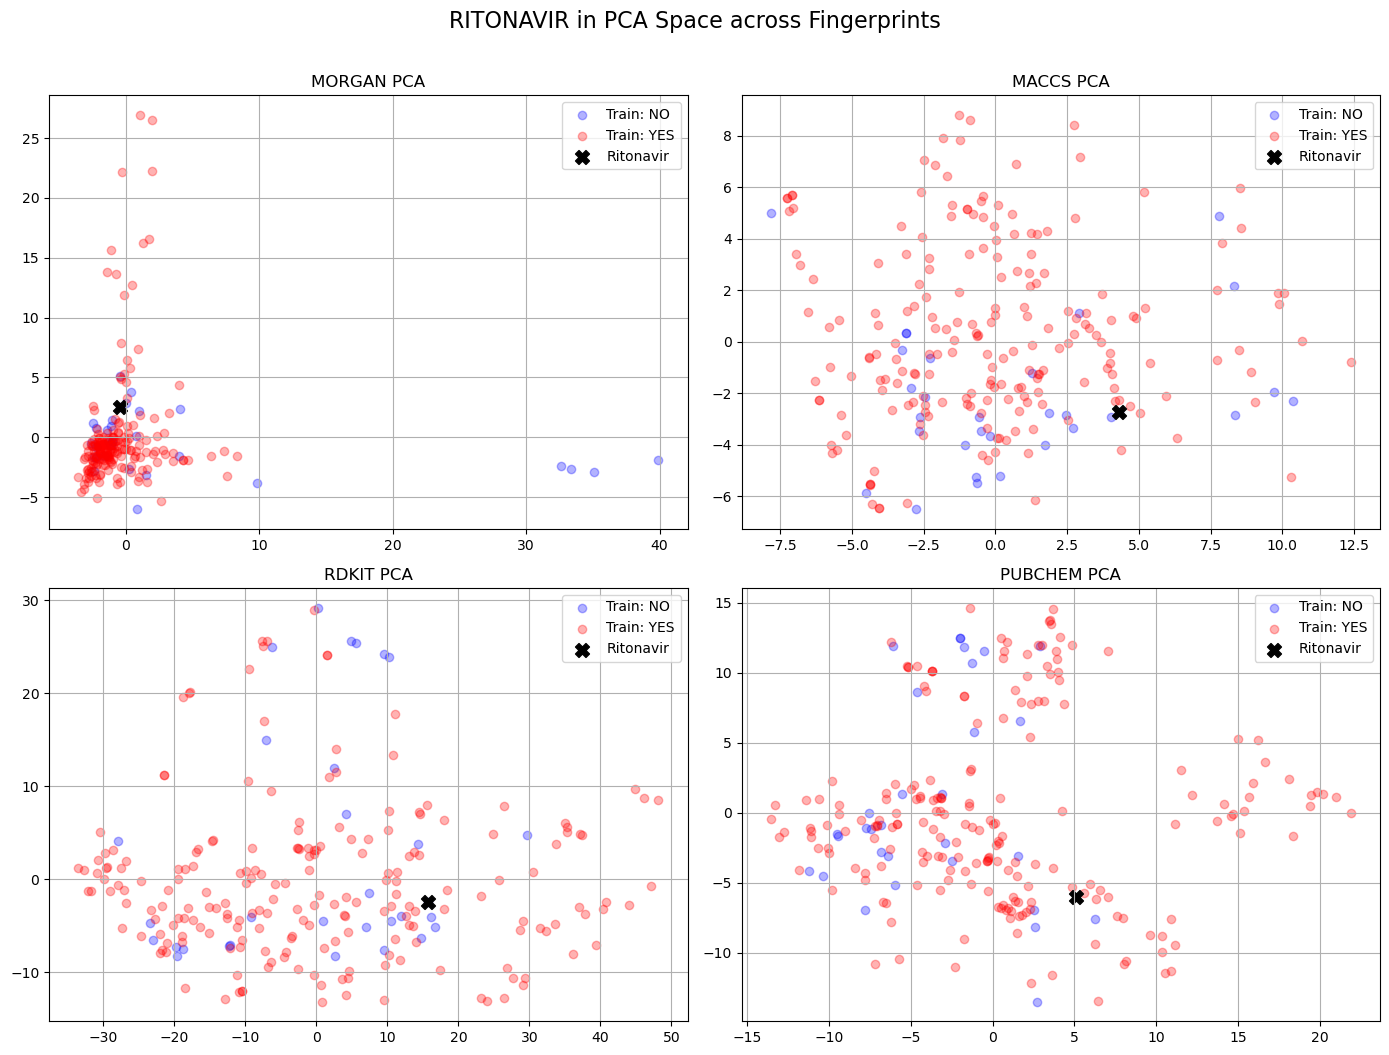

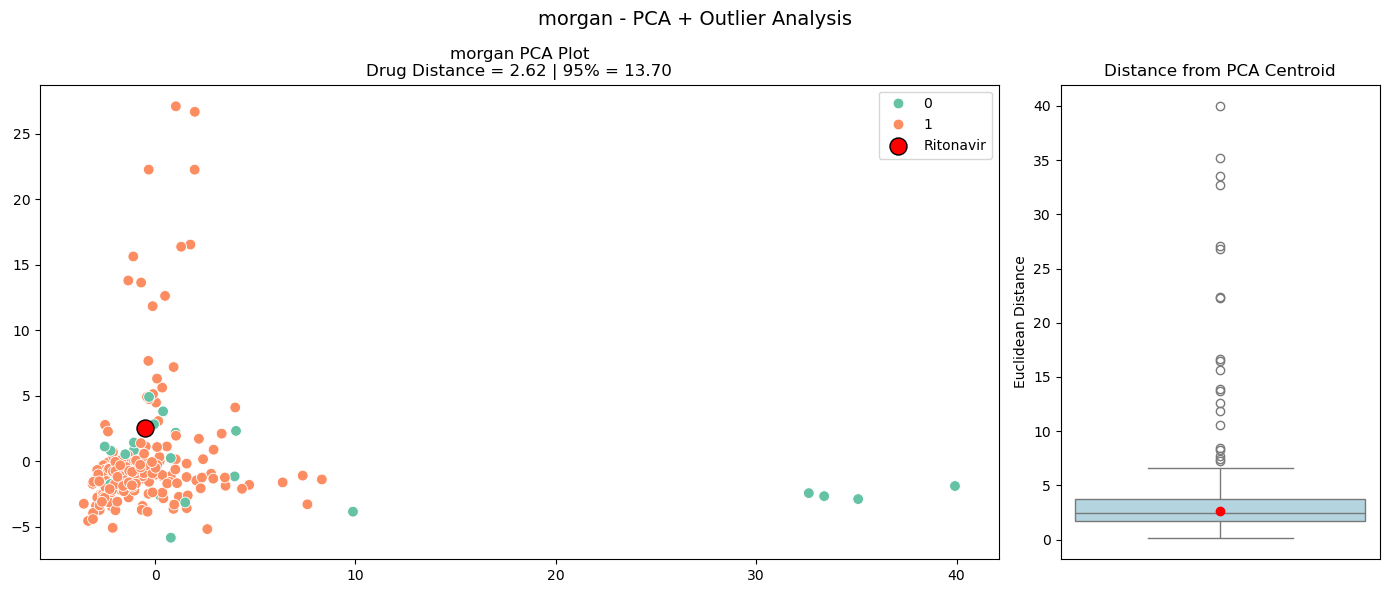

{'distance': 2.6169355971413077,
 'is_outlier': False,
 'percentiles': {'min': 0.16680186548227005,
  '25%': 1.7282455768200868,
  '50%': 2.478501864699798,
  '75%': 3.7688063839866994,
  '95%': 13.698411590831808,
  'max': 39.96772321047431}}

In [23]:
plot_pca_fingerprints(drug_name=drug, target_labels=placenta_target_labels, outpath=outpath)
plot_pca_fingerprints_with_boxplot(drug_name=drug, fp="morgan",target_labels=placenta_target_labels, outpath=outpath)

(array([  9,  22,  32,  34,  39,  40,  66,  75,  86,  88, 106, 107, 116,
       131, 134, 138, 142, 149, 156, 157, 158, 162, 169, 173, 174, 175,
       176, 179, 188, 215, 220]),) ['Salbutamol' 'Chlorthalidone' "p,p'-DDE" 'Fenoterol' 'Glyburide'
 'Hexoprenaline' 'Prazosin' 'Succinylcholine' 'Levothyroxine'
 'Liothyronine' 'Glycopyrrolate' 'Erythromycin' 'Metocurine' 'Vecuronium'
 'Sufentanil' 'Atracurium besylate' 'Pravastatin' 'Duloxetine'
 'Amprenavir' 'Oseltamivir' 'Clarithromycin' 'Lopinavir' 'Darunavir'
 'Ritonavir' 'Norepinephrine' 'Ouabain' 'Meropenem' 'Saquinavir'
 'Azithromycin' 'Indinavir' '(Z)-roxithromycin']
Ritonavir 176


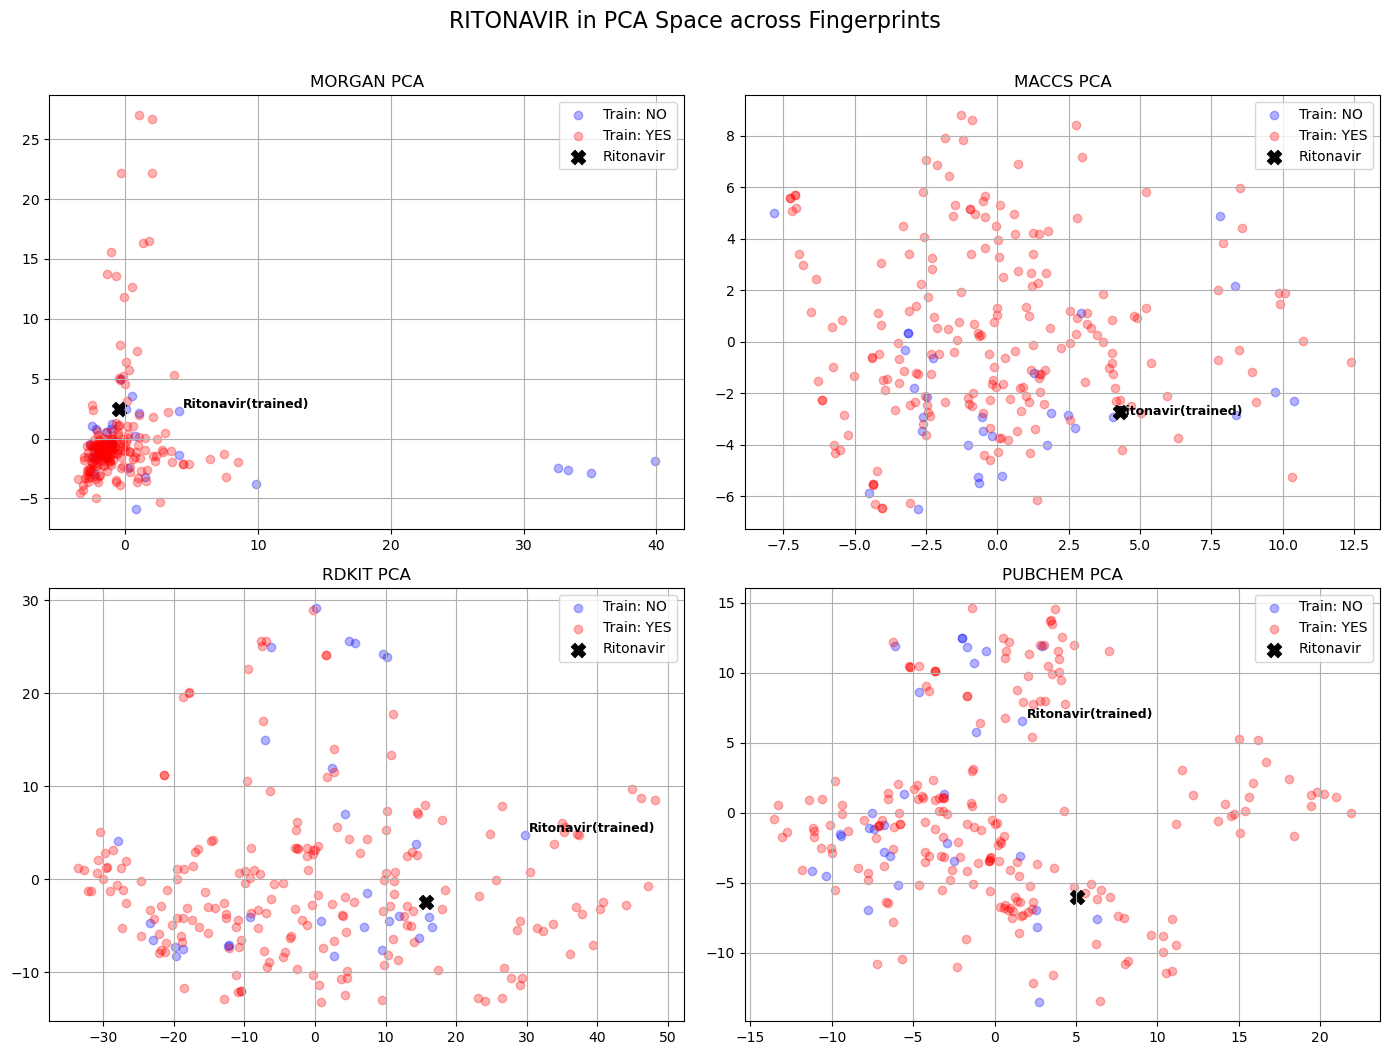

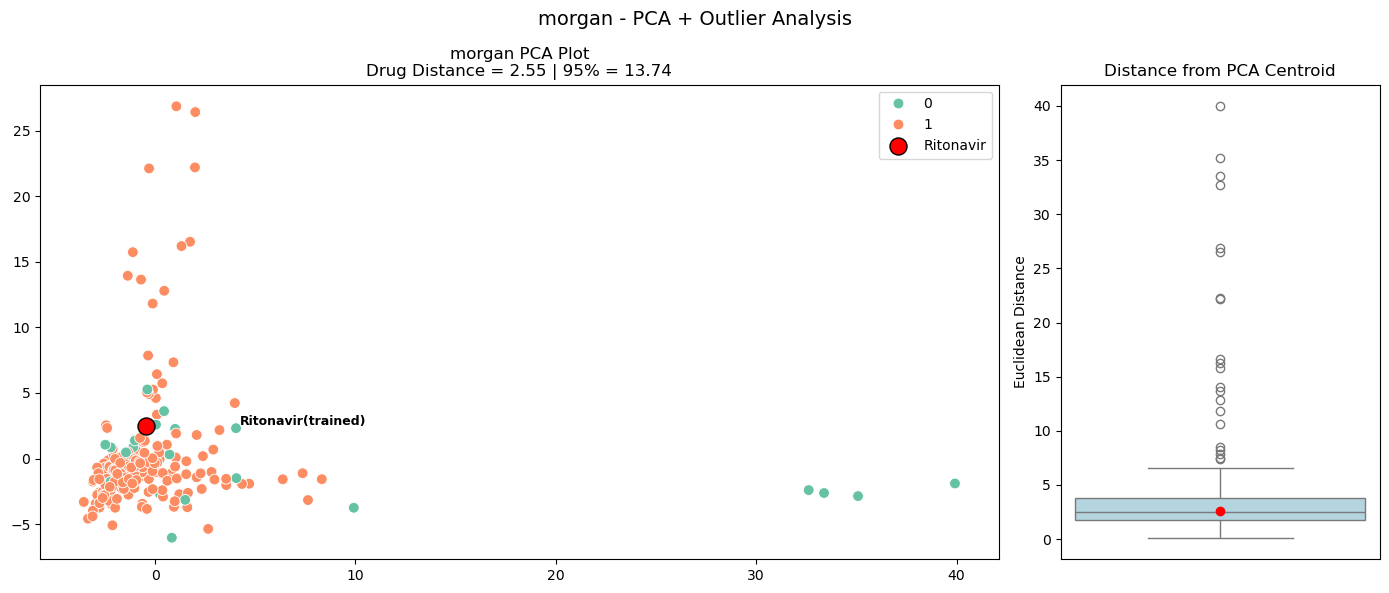

{'distance': 2.553174609954651,
 'is_outlier': False,
 'percentiles': {'min': 0.12862722191070647,
  '25%': 1.7406244846092265,
  '50%': 2.475626060098545,
  '75%': 3.7990559044022807,
  '95%': 13.739044460296949,
  'max': 39.96711100018461}}

In [45]:
#Negative testing for drug that is trained as "NO"
# Ritonavir is one of the NO drugs trained in the model

no_drugs_idxs = np.where(np.asarray(placenta_target_labels) == 0)
print(no_drugs_idxs,filtered_data.iloc[no_drugs_idxs]["cmpdname"].values)

test_Ritonavir = {"Ritonavir": placenta_data_raw[placenta_data_raw["cmpdname"] == "Ritonavir"].index.values[0]}

for train_drug_name, train_drug_index in test_Ritonavir.items():
    print(train_drug_name, train_drug_index)
    
plot_pca_fingerprints(drug_name=drug, target_labels=placenta_target_labels, outpath=outpath, 
                      train_drug_pos=test_Ritonavir)
plot_pca_fingerprints_with_boxplot(drug_name=drug, fp="morgan",
                                   target_labels=placenta_target_labels, 
                                   outpath=outpath,
                                  train_drug_pos=test_Ritonavir)
